# Image Recognition Using LSTM

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


Using TensorFlow backend.


In [3]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [4]:
trainX, trainY, testX, testY = load_dataset()

In [8]:
trainX[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [9]:
trainX =trainX.reshape(trainX.shape[0],28,28)
testX =testX.reshape(testX.shape[0],28,28)

In [10]:
trainX.shape

(60000, 28, 28)

In [11]:
testX.shape

(10000, 28, 28)

In [12]:
from numpy import array
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = array(train).astype('float32')
	test_norm = array(test).astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm/ 255.0
	# return normalized images
	return train_norm, test_norm

In [13]:
trainX, testX = prep_pixels(trainX, testX)

In [14]:
	# define cnn model
	from keras.layers import LSTM
	model = Sequential()
	model.add(LSTM(1, activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28)))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])




Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
	scores, histories = list(), list()

In [16]:
		history = model.fit(trainX, trainY, epochs=1, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)


> 40.550


# Complete code at one place

# Image Recognition Using LSTM

In [5]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array

def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


trainX, trainY, testX, testY = load_dataset()

trainX =trainX.reshape(trainX.shape[0],28,28)
testX =testX.reshape(testX.shape[0],28,28)

trainX.shape

testX.shape



# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = array(train).astype('float32')
	test_norm = array(test).astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm/ 255.0
	# return normalized images
	return train_norm, test_norm

trainX, testX = prep_pixels(trainX, testX)


# define LSTM model

model = Sequential()
model.add(LSTM(30, activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

scores, histories = list(), list()
    
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# append scores
scores.append(acc)
histories.append(history)

> 86.580


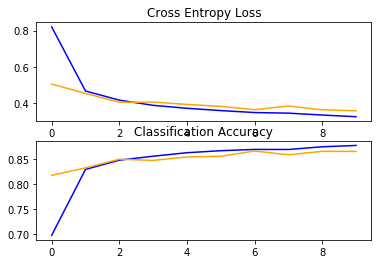

In [8]:
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['acc'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
	pyplot.show()